# Problema 2
# a)

In [4]:
%matplotlib inline

import numpy as np
from numpy import *
import matplotlib.pylab as plt
from matplotlib.pyplot import *
import scipy.stats as sp

with open('datos.dat') as g:
    t,y,err = np.genfromtxt(g, usecols=(0,1,2), unpack=True, dtype=float)
g.close()

Obtenemos los parámetros del polinomio de orden 5 de la misma manera que fueron obtenidos en el Problema 1:

In [5]:
n=len(t)
t1=0.4
t4=0.7

filt = (t1<t) & (t<t4)      

col1 = np.zeros(n)
for i in range(n):   
    if filt[i] == True:
        col1[i] = -1

M = col1

p=5    #Defino el grado del polinomio a ajustar

#Armo la matriz de diseño:
for i in range(p+1):
    M = np.column_stack((M, t**i))

B = np.linalg.inv(np.matmul(M.T,M))
C = np.matmul(M.T,y)
param = np.matmul(B,C)

Utilizamos los parámetros del polinomio obtenidos anteriormente $C_0 ... C_5$ para simular varios sets de datos provenientes de este polinomio a los que les agregaremos ruido Gaussiano.

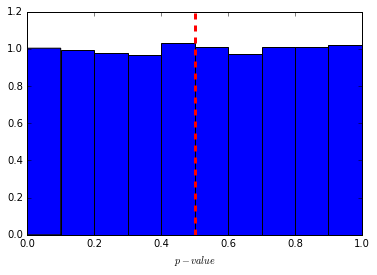

In [34]:
from scipy.special import chdtr as Chi2CDF       #Chi square CDF. Returns the area under the left hand tail (from 0 to x) of the Chi square probability density function with v degrees of freedom
from scipy.special import chdtrc as Chi2Survival #Chi square survival function. Returns the area under the right hand tail (from x to infinity) of the Chi square probability density function with v degrees of freedom

param2 = param[1:]

model1 = (param2[5]*t**5 + param2[4]*t**4 + param2[3]*t**3 + param2[2]*t**2 + param2[1]*t + param2[0])

# Parámetros para generar números aleatorios con distribución Gaussiana
L0 = 0
dL = 30e-06

L_obs1 = np.random.normal(L0, dL, n)

del M

col2 = np.zeros(n)
col2 = col2+1.

M = col2

p=5    #Defino el grado del polinomio a ajustar

#Armo la matriz de diseño:
for i in range(p):
    M = np.column_stack((M, t**(i+1)))
    
err1 = np.array(err)
err1 = err1**2
V = np.diag(err1)
V1 = np.linalg.inv(V)

T = model1 + L_obs1
C = np.matmul(M.T,T)
B = np.linalg.inv(np.matmul(M.T,M))
paramnew = np.matmul(B,C)

L = np.matmul(M,param2)
K = T - L
chi=np.matmul(np.matmul(K.T,V1),K)


for i in range(10000):
    L_obs1 = np.random.normal(L0, dL, n)
    T = model1 + L_obs1
    C = np.matmul(M.T,T)    
    paramnew = np.matmul(B,C)
    L = np.matmul(M,paramnew)
    K = T - L
    chi = np.append(chi, np.matmul(np.matmul(K.T,V1),K))    

chi = chi[1:]

CDF = Chi2CDF(len(y)-6, chi)
Survival = Chi2Survival(len(y)-6, chi)

plt.hist(Survival, bins=10, range=[0, 1], normed=1)#, cumulative=True)
plt.axvline(Survival.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xlabel('$p-value$')
plt.savefig('plot_2.pdf')

Obtenemos una distribución $Uniforme(0,1)$ para los $p-values$

# c)
Ahora ajustemos polinomios de distintos órdenes a los datos obtenidos a partir del modelo del Problema 1 sin el tránsito:

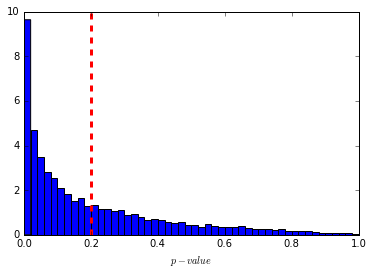

In [60]:
L_obs1 = np.random.normal(L0, dL, n)

del M

col2 = np.zeros(n)
col2 = col2+1.

M = col2

p=3    #Defino el grado del polinomio a ajustar, probamos para p=3,1,12

#Armo la matriz de diseño:
for i in range(p):
    M = np.column_stack((M, t**(i+1)))
    

err1 = np.array(err)
err1 = err1**2

#err1 = (1.388*err1)**2  #Si hago esto (agrando el error), entonces la distribución de los p-values cambia 
                         #cuando el modelo que ajusto es una recta. Agrandando el error consigo que mi 
                         #Hipótesis nula sea rechazada menos veces, es decir, en la distribución de los 
                         #p values aumentan los valores mayores a 0.5, de hecho si agrando demasiado los  
                         #errores entonces no puedo rechazar nunca Ho.
                
V = np.diag(err1)
V1 = np.linalg.inv(V)

T = model1 + L_obs1
C = np.matmul(M.T,T)
B = np.linalg.inv(np.matmul(M.T,M))
paramnew = np.matmul(B,C)

L = np.matmul(M,paramnew)
K = T - L
chi=np.matmul(np.matmul(K.T,V1),K)


for i in range(10000):
    L_obs1 = np.random.normal(L0, dL, n)
    T = model1 + L_obs1
    C = np.matmul(M.T,T)    
    paramnew = np.matmul(B,C)
    L = np.matmul(M,paramnew)
    K = T - L
    chi = np.append(chi, np.matmul(np.matmul(K.T,V1),K))    

chi = chi[1:]

CDF = Chi2CDF(len(y)-6, chi)
Survival = Chi2Survival(len(y)-6, chi)

plt.hist(Survival, bins=50, range=[0, 1], normed=1)#, cumulative=True)
plt.axvline(Survival.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xlabel('$p-value$')
plt.savefig('plot_3.pdf')

# d)
Ahora ajustemos el modelo del Problema 1 CON el tránsito:

Utilizamos los parámetros del modelo obtenido en el Problema 1 ($\delta,\,C_0,\, ... ,\,C_5$) para simular varios sets de datos provenientes de este modelo a los que les agregaremos ruido Gaussiano.

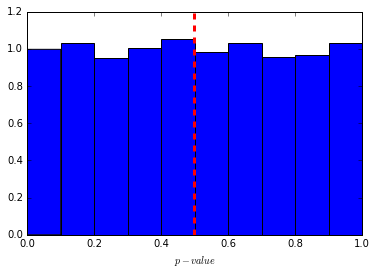

In [53]:
filt1 = (0.1<t) & (t<0.4)
filt2 = (0.4<=t) & (t<=0.7)
filt3 = (0.7<t) & (t<1.0)

a=t[filt1]
b=t[filt2]
c=t[filt3]

z = (param[6]*a**5 + param[5]*a**4 + param[4]*a**3 + param[3]*a**2 + param[2]*a + param[1])
z1 = (param[6]*b**5 + param[5]*b**4 + param[4]*b**3 + param[3]*b**2 + param[2]*b + param[1])-param[0]
z2 = (param[6]*c**5 + param[5]*c**4 + param[4]*c**3 + param[3]*c**2 + param[2]*c + param[1])
z = np.append(z,z1)
z = np.append(z,z2)

L0 = 0
dL = 30e-06

L_obs1 = np.random.normal(L0, dL, n)

del M

col1 = np.zeros(n)
for i in range(n):   
    if filt[i] == True:
        col1[i] = -1

M = col1

p=5    #Defino el grado del polinomio a ajustar

#Armo la matriz de diseño:
for i in range(p+1):
    M = np.column_stack((M, t**i))

err1 = np.array(err)
err1 = err1**2

V = np.diag(err1)
V1 = np.linalg.inv(V)

T = z + L_obs1
C = np.matmul(M.T,T)
B = np.linalg.inv(np.matmul(M.T,M))
paramnew = np.matmul(B,C)

L = np.matmul(M,paramnew)
K = T - L
chi=np.matmul(np.matmul(K.T,V1),K)


for i in range(10000):
    L_obs1 = np.random.normal(L0, dL, n)
    T = z + L_obs1
    C = np.matmul(M.T,T)    
    paramnew = np.matmul(B,C)
    L = np.matmul(M,paramnew)
    K = T - L
    chi = np.append(chi, np.matmul(np.matmul(K.T,V1),K))    

chi = chi[1:]

CDF = Chi2CDF(len(y)-7, chi)
Survival = Chi2Survival(len(y)-7, chi)

plt.hist(Survival, bins=10, range=[0, 1], normed=1)#, cumulative=True)
plt.axvline(Survival.mean(), color='r', linestyle='dashed', linewidth=3)
plt.xlabel('$p-value$')
plt.savefig('plot_6.pdf')